# Object Detection

<b>Task:</b> Implement an object detector which identifies the classes of the objects in an image and video.

<b>Submitted by:</b> Shubham Shanker

Here I have used <b>MobileNet-SSD v3</b> model for object detection. Model weights and configuration can be downloaded from the following link. 

<a href="https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API">Link to download model files</a>

## Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

## Loading the model with configuration and weights of MobileNet-SSD v3

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

## Loading coco class labels

In [4]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


There are total 80 class labels.

## Setting up configuration for model

In [6]:
# The model takes input size as 320X320.
model.setInputSize(320,320)

# Scaling
model.setInputScale(1/127.5)

# mobilenet takes input as [-1,1]
model.setInputMean((127.5,127.5,127.5))

# opencv loads image in BGR format. This ensures to swap
# firts and last layers to convert it to RGB format
model.setInputSwapRB(True)

<dnn_Model 000001DEBE54C690>

# Reading Image

In [7]:
img = cv2.imread('man.jpg')

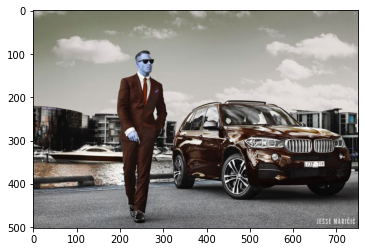

In [8]:
plt.imshow(img) 

opencv reads image in BGR format

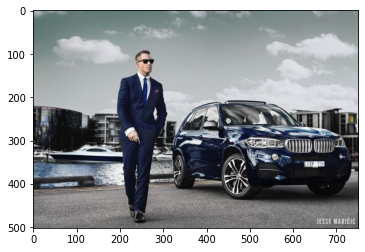

In [9]:
# Showing image in RGB format
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #Converting  RGB

## Detecting objects in image

In [10]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [11]:
font_scale = 2
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    if(ClassInd<=80):
        cv2.rectangle(img,boxes,(255,0,0),2)
        cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)

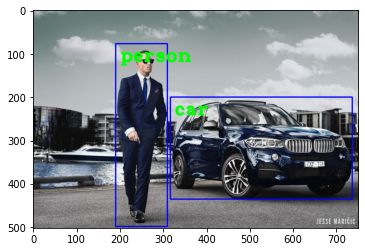

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Detecting objects in video

In [13]:
cap = cv2.VideoCapture('city.mp4')

font_scale = 1
font = cv2.FONT_HERSHEY_COMPLEX_SMALL  

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3) 
                
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [6]]
[[1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [6]]
[[1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [6]
 [3]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [6]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3

[[3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]]
[[1]
 [3]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [3]
 [4]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [4]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [1]
 [3]
 [2]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [2]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [1]
 [4]
 [1]]
[[1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [3]
 [2]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [3]
 [1]
 [3]

[[3]
 [3]
 [6]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]]
[[3]
 [3]
 [6]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]]
[[3]
 [6]
 [3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [6]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [3]
 [1]
 [6]
 [3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [6]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[3]
 [6]
 [1]
 [3]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [3]
 [1]
 [6]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [6]
 [1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]
 [6]
 [1]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [3]
 [1]
 [1]
 [3]
 [6]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [6]
 [3]
 [1]
 [3]
 [7]
 [1]]
[[3]
 [1]
 [1]
 [3]
 [6]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [3]
 [6]
 [1]
 [3]
 [3]
 [1]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [6]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[3]


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-m8us58q4\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
